In [19]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('driver_standings.csv') #importing the csv file
driver_names = pd.read_csv('drivers.csv') #importing the csv file
#df.head()

#grouping the data per driverID and calculating the total points for each driver
driver_points = df.groupby('driverId')['points'].sum().reset_index()

#matching the driverID with the driver names
driver_points = driver_points.merge(driver_names[['driverId', 'forename', 'surname']], on='driverId', how='left')
#creating a new column with the full name of the driver
driver_points['full_name'] = driver_points['forename'] + ' ' + driver_points['surname']
#matching driverID with driver nationality
driver_points = driver_points.merge(driver_names[['driverId', 'nationality']], on='driverId', how='left')

#sorting the data in descending order based on points
driver_points = driver_points.sort_values(by='points', ascending=False)
#print(driver_points.head(10))

In [13]:
# Using KNN to predict average points based on nationality
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder

# Encode nationality as a numeric feature
le = LabelEncoder()
driver_points['nationality_encoded'] = le.fit_transform(driver_points['nationality'])

# Prepare features (X) and target (y)
X = driver_points[['nationality_encoded']]
y = driver_points['points']

# Fit KNN regressor
knn = KNeighborsRegressor(n_neighbors=3)
knn.fit(X, y)

# Predict average points for each nationality
nationalities = driver_points['nationality'].unique()
nationality_encoded = le.transform(nationalities)
predicted_points = knn.predict(nationality_encoded.reshape(-1, 1))

# Display results
#for nat, pts in zip(nationalities, predicted_points):
    #print(f"Predicted points for {nat}: {pts:.2f}")

/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


In [26]:
# Input nationality from user
user_nationality = input("Enter a driver's nationality: ")

# Check if the nationality exists in the label encoder
if user_nationality in le.classes_:
    encoded = le.transform([user_nationality])
    predicted = knn.predict(encoded.reshape(-1, 1))[0]
    print(f"Predicted points for a driver from {user_nationality}: {predicted:.2f}")
else:
    print("Nationality not found in the dataset.")

Predicted points for a driver from Dutch: 10989.17


/home/codespace/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


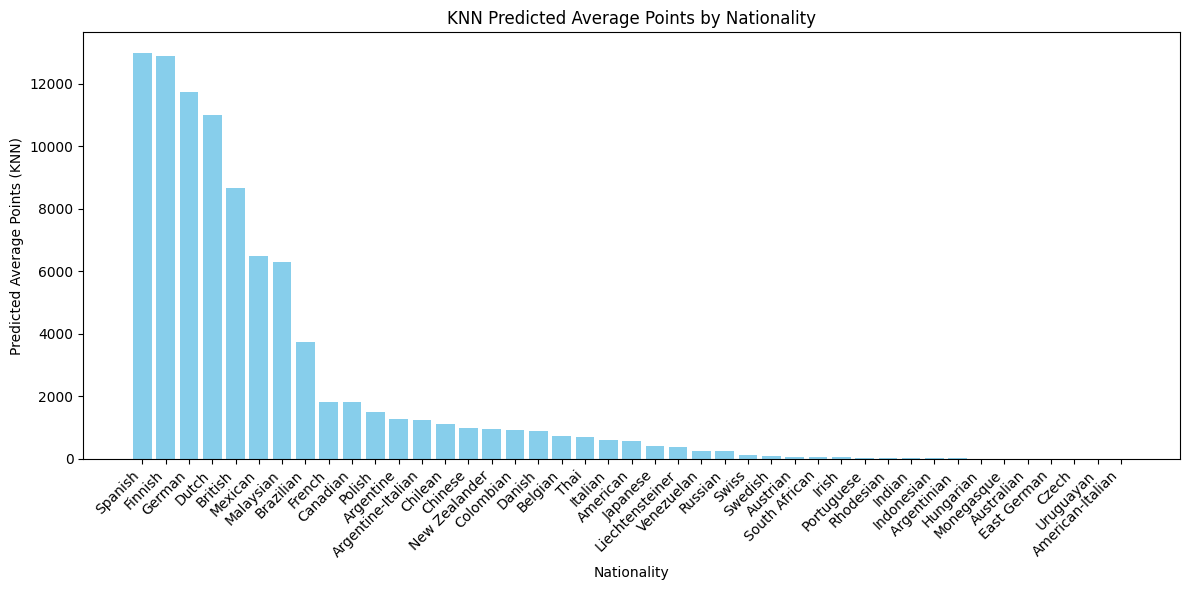

In [22]:
# designing a graph to visualize points based on nationality
nat_points = pd.DataFrame({'nationality': nationalities, 'predicted_points': predicted_points})
nat_points = nat_points.sort_values(by='predicted_points', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(nat_points['nationality'], nat_points['predicted_points'], color='skyblue')
plt.xlabel('Nationality')
plt.ylabel('Predicted Average Points (KNN)')
plt.title('KNN Predicted Average Points by Nationality')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()